In [1]:
cd datasets/NLS

C:\Users\Daniele\Desktop\Materiale Tesi\Tesi magistrale\datasets\NLS


# Import

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

# Aggiungo gli headers al CSV
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv('KDDTrain+.csv', encoding='cp1252', names = col_names)
df_test = pd.read_csv('KDDTest+.csv', encoding='cp1252', names = col_names)

labeldf=df['label']
labeldf_test=df_test['label']

C:\Users\Daniele\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Daniele\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Functions

In [3]:
#Dataset Preparation ----------------------------------------------------------------------------------------------------------

def prepareMulticlass():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    return newlabeldf, newlabeldf_test

def prepareBinary():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    return newlabeldf, newlabeldf_test
  
colNames=list()
colNames_test=list()

def getFullDf():
    global colNames
    colNames=list(df)
    return df

def getFullDfTest():
    global colNames_test
    colNames_test=list(df_test)
    return df_test

def getReducedDf():
    global colNames
    df_reduced=df.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames=list(df_reduced)
    return df_reduced

def getReducedDfTest():
    global colNames_test
    df_reduced=df_test.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames_test=list(df_reduced)
    return df_reduced

def oneHotEcoding(df, column_name):
    df_drop = df.drop(column_name, axis=1, inplace=False)
    one_hot = pd.get_dummies(df[column_name])
    if(column_name == 'service'):
        column_list=list()
        for string in one_hot.columns.tolist():
            column_list.append(column_name+'_'+str(string))
        one_hot.columns=column_list
    df = pd.concat([df_drop, one_hot], axis=1)
    
    return df

def getXandY(df):
    X = df.drop('label',axis=1, inplace=False)
    Y = df.label
    return X, Y

def overSampledDF(X, Y): 
    sm = SMOTE(random_state=42)
    X_resampled, Y_resampled = sm.fit_resample(X, Y)
    df = pd.concat([X_resampled, Y_resampled], axis=1)
    return df

def createMulticlassDF(df):
    to_drop_DoS = [0,1]
    to_drop_Probe = [0,2]
    to_drop_R2L = [0,3]
    to_drop_U2R = [0,4]

    DoS_df=df[df['label'].isin(to_drop_DoS)];
    Probe_df=df[df['label'].isin(to_drop_Probe)];
    R2L_df=df[df['label'].isin(to_drop_R2L)];
    U2R_df=df[df['label'].isin(to_drop_U2R)];
    return DoS_df, Probe_df, R2L_df, U2R_df 

def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler.transform(df) 

def minMaxScaler(df):
    scaler = preprocessing.MinMaxScaler().fit(df)
    return scaler.transform(df)

def recursiveFeatureExtraction(model, X, Y, n):
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X, Y)
    X=rfe.transform(X)
    true=rfe.support_
    rfecolindex=[i for i, x in enumerate(true) if x]
    rfecolname=list(colNames[i] for i in rfecolindex)
    return X, rfecolindex

def adaptTestset(train, test):
    train_service_list=[]
    test_service_list = []
    
    for string in train.columns.tolist():
        if('service' in string):
            train_service_list.append(string)
    
    for string in test.columns.tolist():
        if('service' in string):
            test_service_list.append(string)

    difference=list(set(train_service_list) - set(test_service_list))

    for col in difference:
        test[col] = 0
    return test.reindex(columns=train.columns)

# Algorythms-------------------------------------------------------------------------------------------------------------------- 

def randomForest(X, Y):
    clf = RandomForestClassifier(n_estimators=64,n_jobs=2)
    return clf.fit(X, Y)

def stratifiedCV(model, X, Y, k, pos_label):
    skf = StratifiedKFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}
  
    
def KfoldCV(model, X, Y, k, pos_label):
    skf = KFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred )
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}

#Plotting-----------------------------------------------------------------------------------------------------------------------

def plotDf(y):
    plt.figure(figsize=(10,5))
    class_distribution = y.value_counts()
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Data points per Class')
    plt.title('Distribution of yi in train data')
    plt.grid()
    return plt

def plotConfusionMatrix(Y_pred, Y_test, pos_label):
    skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)
    plt.show()
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy: %0.5f " % accuracy)
    precision = precision_score(Y_test, Y_pred, pos_label=pos_label)
    print("Precision: %0.5f " % precision)
    recall = recall_score(Y_test, Y_pred, pos_label=pos_label)
    print("Recall: %0.5f " % recall)
    f = f1_score(Y_test, Y_pred, pos_label=pos_label)
    print("F-measure: %0.5f " % f)

# Reduced DF, no oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

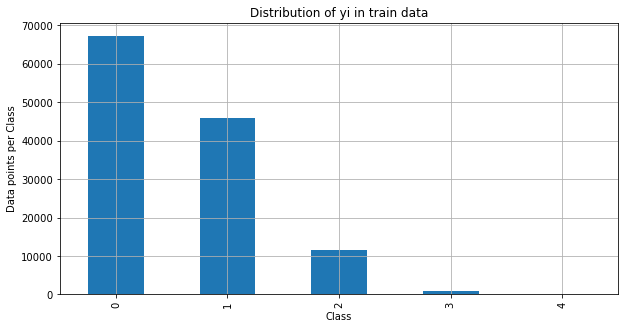

In [4]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

plotDf(reducedDf['label'])


In [5]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(reducedDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(reducedDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [6]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [7]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9999519339238594,
 'Mean Training Precision': 0.9999419353039741,
 'Mean Training Recall': 0.9999395117052847,
 'Mean Training F1 Score': 0.999940722494722,
 'Mean Validation Accuracy': 0.9996998322592037,
 'Mean Validation Precision': 0.9997381808985674,
 'Mean Validation Recall': 0.9995219197432114,
 'Mean Validation F1 Score': 0.9996299983536814}

#### K-fold cross validation on dos Standard Scaler

In [8]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9999509529835301,
 'Mean Training Precision': 0.999932259506072,
 'Mean Training Recall': 0.999946765489997,
 'Mean Training F1 Score': 0.9999395117367909,
 'Mean Validation Accuracy': 0.9996998322592037,
 'Mean Validation Precision': 0.999738856887442,
 'Mean Validation Recall': 0.9995205188595546,
 'Mean Validation F1 Score': 0.9996296327351134}

#### Stratified cross validation on dos

In [9]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9999519339238594,
 'Mean Training Precision': 0.9999177493487383,
 'Mean Training Recall': 0.9999637104968555,
 'Mean Training F1 Score': 0.9999407286207183,
 'Mean Validation Accuracy': 0.9997086607221682,
 'Mean Validation Precision': 0.9996951883053005,
 'Mean Validation Recall': 0.9995863080539923,
 'Mean Validation F1 Score': 0.999640718553584}

#### Stratified cross validation on dos Standard Scaler

In [10]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9999519339238594,
 'Mean Training Precision': 0.9999274246807254,
 'Mean Training Recall': 0.999954033175056,
 'Mean Training F1 Score': 0.9999407279768983,
 'Mean Validation Accuracy': 0.9997263176480976,
 'Mean Validation Precision': 0.9997604813994254,
 'Mean Validation Recall': 0.9995645405332004,
 'Mean Validation F1 Score': 0.9996624718508503}

#### Predict on dos

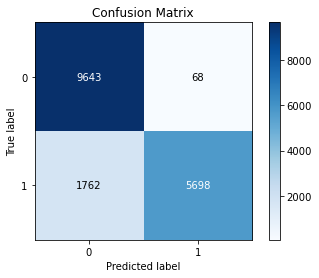

Accuracy: 0.89342 
Precision: 0.98821 
Recall: 0.76381 
F-measure: 0.86164 


In [11]:
y_dos_prediction = randomForest(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

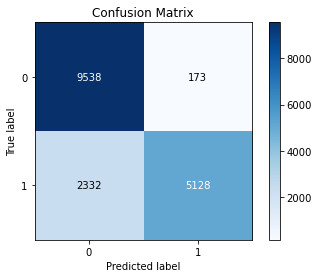

Accuracy: 0.85411 
Precision: 0.96736 
Recall: 0.68740 
F-measure: 0.80370 


In [12]:
y_dos_prediction = randomForest(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [13]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9999760897173369,
 'Mean Training Precision': 0.9999522775349463,
 'Mean Training Recall': 0.9998856551446046,
 'Mean Training F1 Score': 0.9999189629380425,
 'Mean Validation Accuracy': 0.998886066334306,
 'Mean Validation Precision': 0.9979432751260351,
 'Mean Validation Recall': 0.9944967951671717,
 'Mean Validation F1 Score': 0.9962159397221664}

#### K-fold cross validation on probe Standard Scaler

In [14]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9999760897173369,
 'Mean Training Precision': 0.9999426858475738,
 'Mean Training Recall': 0.9998952504851021,
 'Mean Training F1 Score': 0.9999189638585987,
 'Mean Validation Accuracy': 0.9988860631292857,
 'Mean Validation Precision': 0.9981163830219602,
 'Mean Validation Recall': 0.9943363783631508,
 'Mean Validation F1 Score': 0.9962220174022589}

#### Stratified cross validation on probe

In [15]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9999760897173369,
 'Mean Training Precision': 0.9999332715980895,
 'Mean Training Recall': 0.9999046756587129,
 'Mean Training F1 Score': 0.9999189720382559,
 'Mean Validation Accuracy': 0.9990253084431453,
 'Mean Validation Precision': 0.9986226151053484,
 'Mean Validation Recall': 0.994766672310603,
 'Mean Validation F1 Score': 0.9966897955742017}

#### Stratified cross validation on probe Standard Scaler

In [16]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.999974683227794,
 'Mean Training Precision': 0.9999428044865549,
 'Mean Training Recall': 0.9998856107904557,
 'Mean Training F1 Score': 0.9999142044579982,
 'Mean Validation Accuracy': 0.9989746739292427,
 'Mean Validation Precision': 0.9986214243780648,
 'Mean Validation Recall': 0.9944235455208004,
 'Mean Validation F1 Score': 0.9965163464902853}

#### Predict on probe

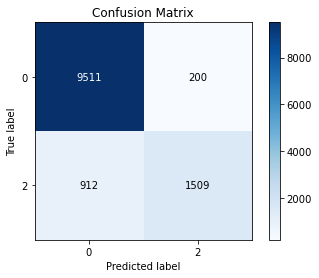

Accuracy: 0.90834 
Precision: 0.88297 
Recall: 0.62330 
F-measure: 0.73075 


In [17]:
y_probe_prediction = randomForest(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

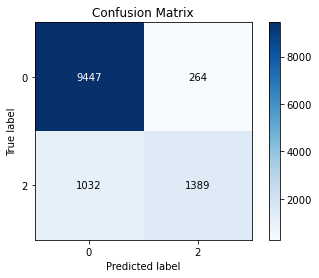

Accuracy: 0.89318 
Precision: 0.84029 
Recall: 0.57373 
F-measure: 0.68189 


In [18]:
y_probe_prediction = randomForest(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [19]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9994146762592886,
 'Mean Validation Precision': 0.9967654320987656,
 'Mean Validation Recall': 0.9627836916996888,
 'Mean Validation F1 Score': 0.9794075244678835}

#### K-fold cross validation on r2l Standard Scaler

In [20]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9999983740894901,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.9998877665544332,
 'Mean Training F1 Score': 0.9999438517686693,
 'Mean Validation Accuracy': 0.9993122493694525,
 'Mean Validation Precision': 0.9953460553225465,
 'Mean Validation Recall': 0.9569115720757507,
 'Mean Validation F1 Score': 0.9756063744576737}

#### Stratified cross validation on r2l

In [21]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9992244530568977,
 'Mean Validation Precision': 0.9948413978494625,
 'Mean Validation Recall': 0.9517979797979799,
 'Mean Validation F1 Score': 0.9727055101670523}

#### Stratified cross validation on r2l Standard Scaler

In [22]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9999967481789802,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.9997766610135674,
 'Mean Training F1 Score': 0.9998882681215531,
 'Mean Validation Accuracy': 0.9992390836341787,
 'Mean Validation Precision': 0.9928430985297346,
 'Mean Validation Recall': 0.9547878787878787,
 'Mean Validation F1 Score': 0.9732851582698483}

#### Predict on r2l

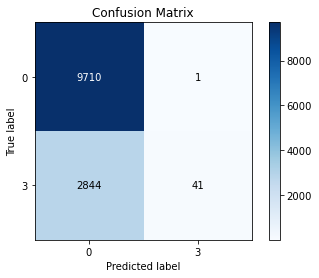

Accuracy: 0.77413 
Precision: 0.97619 
Recall: 0.01421 
F-measure: 0.02802 


In [23]:
y_r2l_prediction = randomForest(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

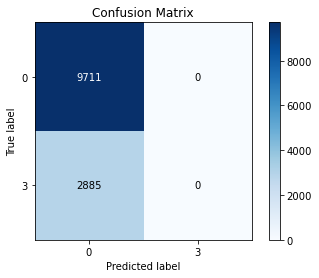

Accuracy: 0.77096 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
y_r2l_prediction = randomForest(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [25]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9999868107591222,
 'Mean Training Precision': 0.9979166666666668,
 'Mean Training Recall': 0.9849574608247134,
 'Mean Training F1 Score': 0.991344340143591,
 'Mean Validation Accuracy': 0.9995845367084639,
 'Mean Validation Precision': 0.9133333333333333,
 'Mean Validation Recall': 0.5233333333333333,
 'Mean Validation F1 Score': 0.6472510822510823}

#### K-fold cross validation on u2r Standard Scaler

In [26]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9999851620904223,
 'Mean Training Precision': 0.9978260869565216,
 'Mean Training Recall': 0.9828298012502452,
 'Mean Training F1 Score': 0.9902466909607568,
 'Mean Validation Accuracy': 0.9995548587146963,
 'Mean Validation Precision': 0.8300000000000001,
 'Mean Validation Recall': 0.525,
 'Mean Validation F1 Score': 0.6336796536796537}

#### Stratified cross validation on u2r

In [27]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9999851621176028,
 'Mean Training Precision': 0.9979166666666666,
 'Mean Training Recall': 0.9829324699352453,
 'Mean Training F1 Score': 0.9903215856017216,
 'Mean Validation Accuracy': 0.9995251873258233,
 'Mean Validation Precision': 0.85,
 'Mean Validation Recall': 0.4800000000000001,
 'Mean Validation F1 Score': 0.6026190476190475}

#### Stratified cross validation on u2r Standard Scaler

In [28]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9999835134217221,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.978677150786309,
 'Mean Training F1 Score': 0.9891527827011697,
 'Mean Validation Accuracy': 0.9995251829225603,
 'Mean Validation Precision': 0.8583333333333334,
 'Mean Validation Recall': 0.4800000000000001,
 'Mean Validation F1 Score': 0.5948773448773449}

#### Predict on u2r

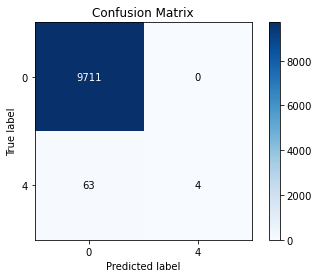

Accuracy: 0.99356 
Precision: 1.00000 
Recall: 0.05970 
F-measure: 0.11268 


In [29]:
y_u2r_prediction = randomForest(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

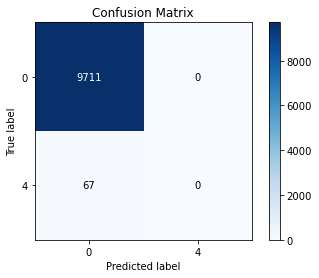

Accuracy: 0.99315 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_u2r_prediction = randomForest(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Feature Selection

In [31]:

X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [32]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [33]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.999938200759248,
 'Mean Training Precision': 0.9999274234040971,
 'Mean Training Recall': 0.9999201487869211,
 'Mean Training F1 Score': 0.9999237844734136,
 'Mean Validation Accuracy': 0.9993290368146907,
 'Mean Validation Precision': 0.9994551031128317,
 'Mean Validation Recall': 0.99888813336946,
 'Mean Validation F1 Score': 0.9991714359585497}

#### K-fold cross validation on dos Standard Scaler

In [34]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9999293722962832,
 'Mean Training Precision': 0.9999395185603086,
 'Mean Training Recall': 0.9998862865476852,
 'Mean Training F1 Score': 0.9999129011197881,
 'Mean Validation Accuracy': 0.9995762337776993,
 'Mean Validation Precision': 0.9996964726925468,
 'Mean Validation Recall': 0.9992597576578234,
 'Mean Validation F1 Score': 0.9994780410176229}

#### Stratified cross validation on dos

In [35]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9999391816995773,
 'Mean Training Precision': 0.9999346801112491,
 'Mean Training Recall': 0.9999153247658006,
 'Mean Training F1 Score': 0.9999250010925136,
 'Mean Validation Accuracy': 0.9993202083517261,
 'Mean Validation Precision': 0.9993249886296278,
 'Mean Validation Recall': 0.9989984190454948,
 'Mean Validation F1 Score': 0.9991615912048719}

#### Stratified cross validation on dos Standard Scaler

In [36]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9999293722962832,
 'Mean Training Precision': 0.9999322612634295,
 'Mean Training Recall': 0.9998935509819725,
 'Mean Training F1 Score': 0.9999129034597427,
 'Mean Validation Accuracy': 0.9994614637591596,
 'Mean Validation Precision': 0.9994774182539145,
 'Mean Validation Recall': 0.9991943788874298,
 'Mean Validation F1 Score': 0.9993358357404765}

#### Predict on dos

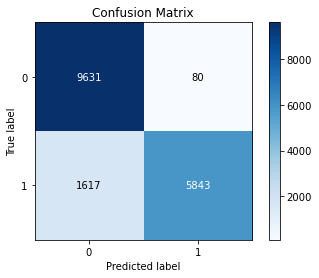

Accuracy: 0.90117 
Precision: 0.98649 
Recall: 0.78324 
F-measure: 0.87320 


In [37]:
y_dos_rfe_prediction = randomForest(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

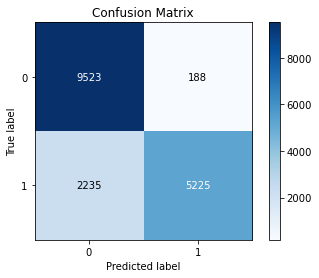

Accuracy: 0.85889 
Precision: 0.96527 
Recall: 0.70040 
F-measure: 0.81178 


In [38]:
y_dos_rfe_prediction = randomForest(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [39]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.999974683227794,
 'Mean Training Precision': 0.9999332653045953,
 'Mean Training Recall': 0.9998951896003371,
 'Mean Training F1 Score': 0.9999142256335342,
 'Mean Validation Accuracy': 0.9989493542685262,
 'Mean Validation Precision': 0.9982019268708194,
 'Mean Validation Recall': 0.9946733981212906,
 'Mean Validation F1 Score': 0.9964338431934141}

#### K-fold cross validation on probe Standard Scaler

In [40]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9999760897173369,
 'Mean Training Precision': 0.9999427291724905,
 'Mean Training Recall': 0.9998952035070603,
 'Mean Training F1 Score': 0.9999189638498416,
 'Mean Validation Accuracy': 0.9988734081064579,
 'Mean Validation Precision': 0.997870288954433,
 'Mean Validation Recall': 0.9944951171003732,
 'Mean Validation F1 Score': 0.9961779044711803}

#### Stratified cross validation on probe

In [41]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.999974683227794,
 'Mean Training Precision': 0.9999237432519502,
 'Mean Training Recall': 0.9999046738413672,
 'Mean Training F1 Score': 0.9999142062751709,
 'Mean Validation Accuracy': 0.9990126470102769,
 'Mean Validation Precision': 0.9980215362948949,
 'Mean Validation Recall': 0.9952813256870267,
 'Mean Validation F1 Score': 0.9966487072540812}

#### Stratified cross validation on probe Standard Scaler

In [42]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.999974683227794,
 'Mean Training Precision': 0.9999332706892433,
 'Mean Training Recall': 0.9998951418615748,
 'Mean Training F1 Score': 0.9999142053667145,
 'Mean Validation Accuracy': 0.9988480852407211,
 'Mean Validation Precision': 0.998276526754417,
 'Mean Validation Recall': 0.9939085976781336,
 'Mean Validation F1 Score': 0.9960870904689607}

#### Predict on probe

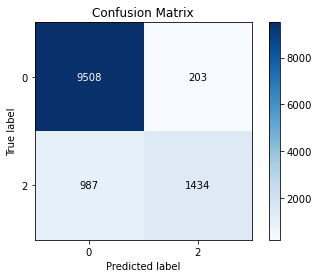

Accuracy: 0.90191 
Precision: 0.87599 
Recall: 0.59232 
F-measure: 0.70675 


In [43]:
y_probe_rfe_prediction = randomForest(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

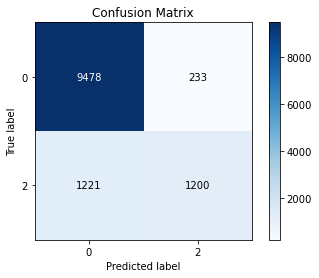

Accuracy: 0.88015 
Precision: 0.83740 
Recall: 0.49566 
F-measure: 0.62273 


In [44]:
y_probe_rfe_prediction = randomForest(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [45]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9999691077796184,
 'Mean Training Precision': 0.9994390235141429,
 'Mean Training Recall': 0.998435984659408,
 'Mean Training F1 Score': 0.9989369160492905,
 'Mean Validation Accuracy': 0.9992537142114599,
 'Mean Validation Precision': 0.9952535140562248,
 'Mean Validation Recall': 0.952599844645061,
 'Mean Validation F1 Score': 0.973385400622098}

#### K-fold cross validation on r2l Standard Scaler

In [46]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.999996748231851,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.9997755331088664,
 'Mean Training F1 Score': 0.9998876404494382,
 'Mean Validation Accuracy': 0.9993415126654929,
 'Mean Validation Precision': 0.9957450239355001,
 'Mean Validation Recall': 0.9587409242317358,
 'Mean Validation F1 Score': 0.9767679973304672}

#### Stratified cross validation on r2l

In [47]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.999969107806054,
 'Mean Training Precision': 0.9993299830407023,
 'Mean Training Recall': 0.9985483589385475,
 'Mean Training F1 Score': 0.9989386402265229,
 'Mean Validation Accuracy': 0.9992244530568977,
 'Mean Validation Precision': 0.9968077956989247,
 'Mean Validation Recall': 0.9497878787878788,
 'Mean Validation F1 Score': 0.9726042855580349}

#### Stratified cross validation on r2l Standard Scaler

In [48]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9992976166506933,
 'Mean Validation Precision': 0.9969065656565658,
 'Mean Validation Recall': 0.9547878787878787,
 'Mean Validation F1 Score': 0.9752699368761665}

#### Predict on r2l

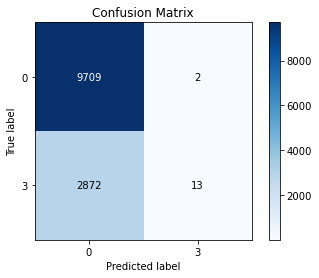

Accuracy: 0.77183 
Precision: 0.86667 
Recall: 0.00451 
F-measure: 0.00897 


In [49]:
y_r2l_rfe_prediction = randomForest(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

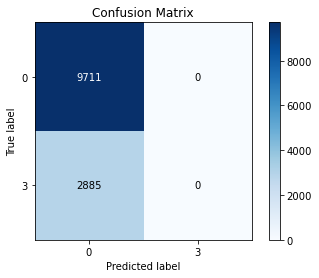

Accuracy: 0.77096 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
y_r2l_rfe_prediction = randomForest(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [51]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9999835134489029,
 'Mean Training Precision': 0.9957890070921985,
 'Mean Training Recall': 0.9828298012502452,
 'Mean Training F1 Score': 0.9891913123093236,
 'Mean Validation Accuracy': 0.9996142125005999,
 'Mean Validation Precision': 0.8616666666666667,
 'Mean Validation Recall': 0.6266666666666667,
 'Mean Validation F1 Score': 0.710064935064935}

#### K-fold cross validation on u2r Standard Scaler

In [52]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9999868107591222,
 'Mean Training Precision': 0.9979166666666666,
 'Mean Training Recall': 0.9849574608247134,
 'Mean Training F1 Score': 0.991344340143591,
 'Mean Validation Accuracy': 0.99956969771158,
 'Mean Validation Precision': 0.7950000000000002,
 'Mean Validation Recall': 0.5991666666666667,
 'Mean Validation F1 Score': 0.671988011988012}

#### Stratified cross validation on u2r

In [53]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9999835134760836,
 'Mean Training Precision': 0.9979166666666666,
 'Mean Training Recall': 0.980804810360777,
 'Mean Training F1 Score': 0.9892229413754474,
 'Mean Validation Accuracy': 0.9996142147022316,
 'Mean Validation Precision': 0.8916666666666668,
 'Mean Validation Recall': 0.5766666666666667,
 'Mean Validation F1 Score': 0.6903968253968253}

#### Stratified cross validation on u2r Standard Scaler

In [54]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9999868107591222,
 'Mean Training Precision': 0.9979166666666666,
 'Mean Training Recall': 0.9850601295097133,
 'Mean Training F1 Score': 0.9913968544189258,
 'Mean Validation Accuracy': 0.9995548653195909,
 'Mean Validation Precision': 0.875,
 'Mean Validation Recall': 0.5,
 'Mean Validation F1 Score': 0.6248412698412699}

#### Predict on u2r

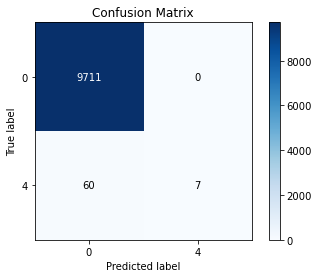

Accuracy: 0.99386 
Precision: 1.00000 
Recall: 0.10448 
F-measure: 0.18919 


In [55]:
y_u2r_rfe_prediction = randomForest(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

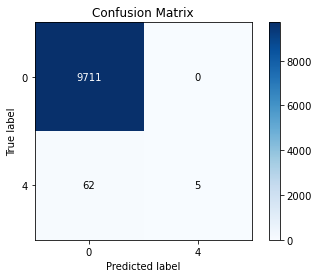

Accuracy: 0.99366 
Precision: 1.00000 
Recall: 0.07463 
F-measure: 0.13889 


In [56]:
y_u2r_rfe_prediction = randomForest(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

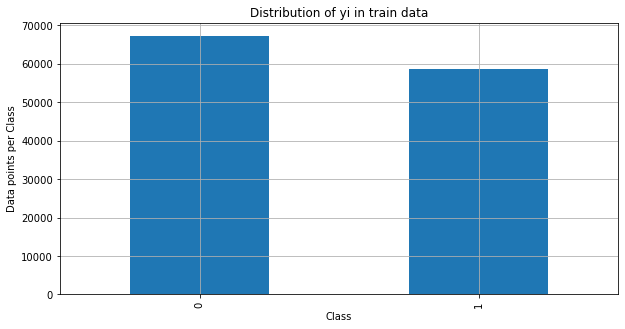

In [57]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareBinary()
plotDf(reducedDf['label'])

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)

#### K-fold cross validation

In [58]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9999347302988235,
 'Mean Training Precision': 0.9999450219463111,
 'Mean Training Recall': 0.9999147357531071,
 'Mean Training F1 Score': 0.9999298780968437,
 'Mean Validation Accuracy': 0.9986028784941287,
 'Mean Validation Precision': 0.9992293225909362,
 'Mean Validation Recall': 0.9977625581732902,
 'Mean Validation F1 Score': 0.9984953544458584}

#### K-fold cross validation Standard Scaler

In [59]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9999320842361648,
 'Mean Training Precision': 0.9999204064007537,
 'Mean Training Recall': 0.9999336631942592,
 'Mean Training F1 Score': 0.999927033873214,
 'Mean Validation Accuracy': 0.9985869985474081,
 'Mean Validation Precision': 0.9992135625983444,
 'Mean Validation Recall': 0.9977464862923391,
 'Mean Validation F1 Score': 0.9984794092009344}

#### Predict

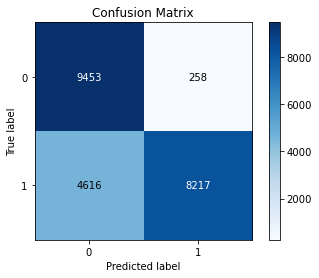

Accuracy: 0.78380 
Precision: 0.96956 
Recall: 0.64030 
F-measure: 0.77126 


In [60]:
y_prediction = randomForest(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

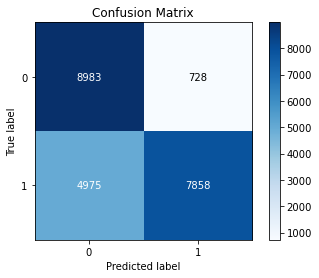

Accuracy: 0.74703 
Precision: 0.91521 
Recall: 0.61233 
F-measure: 0.73374 


In [61]:
y_prediction = randomForest(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [62]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), x_df, y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [63]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), x_df_ss, y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [64]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9999073875813327,
 'Mean Training Precision': 0.9998749414182028,
 'Mean Training Recall': 0.9999260843432303,
 'Mean Training F1 Score': 0.999900511399837,
 'Mean Validation Accuracy': 0.9978725647791995,
 'Mean Validation Precision': 0.998545260215316,
 'Mean Validation Recall': 0.9968765404497034,
 'Mean Validation F1 Score': 0.9977101080688531}

#### K-fold cross validation Standard Scaler

In [65]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9999170898344204,
 'Mean Training Precision': 0.9998730581799826,
 'Mean Training Recall': 0.9999488167957047,
 'Mean Training F1 Score': 0.9999109356956393,
 'Mean Validation Accuracy': 0.9979598852671486,
 'Mean Validation Precision': 0.9986315608335318,
 'Mean Validation Recall': 0.9969816367074911,
 'Mean Validation F1 Score': 0.9978057657876329}

#### Predict

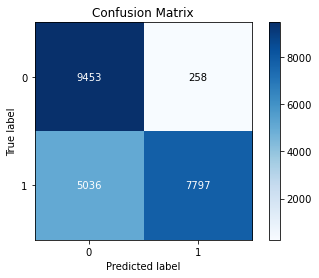

Accuracy: 0.76517 
Precision: 0.96797 
Recall: 0.60757 
F-measure: 0.74655 


In [66]:
y_prediction = randomForest(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

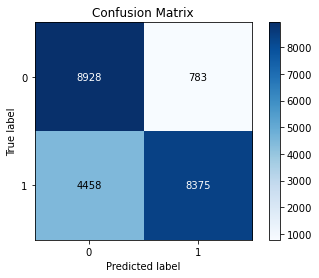

Accuracy: 0.76752 
Precision: 0.91450 
Recall: 0.65261 
F-measure: 0.76168 


In [67]:
y_prediction = randomForest(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

# Reduced DF, oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

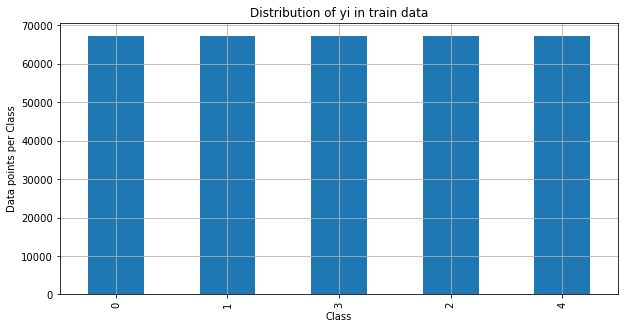

In [68]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)


oversampled_df = overSampledDF(x_df, y_df)
oversampled_df_test = overSampledDF(x_df_test, y_df_test)

plotDf(oversampled_df['label'])

In [69]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(oversampled_df)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(oversampled_df_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [70]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [71]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999595767767648,
 'Mean Training Precision': 0.9999398579980939,
 'Mean Training Recall': 0.999978858742541,
 'Mean Training F1 Score': 0.9999593576000407,
 'Mean Validation Accuracy': 0.9997772613538446,
 'Mean Validation Precision': 0.9997988499792193,
 'Mean Validation Recall': 0.9997106947729375,
 'Mean Validation F1 Score': 0.9997547622160212}

#### K-fold cross validation on dos Standard Scaler

In [72]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999595767767648,
 'Mean Training Precision': 0.9999602331054323,
 'Mean Training Recall': 0.9999584804787481,
 'Mean Training F1 Score': 0.9999593566540123,
 'Mean Validation Accuracy': 0.9997772624563774,
 'Mean Validation Precision': 0.9997991371025116,
 'Mean Validation Recall': 0.9996889281638403,
 'Mean Validation F1 Score': 0.9997440219470622}

#### Stratified cross validation on dos

In [73]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999595767835705,
 'Mean Training Precision': 0.9999505036799888,
 'Mean Training Recall': 0.9999686514115101,
 'Mean Training F1 Score': 0.9999595771306433,
 'Mean Validation Accuracy': 0.9997475651830096,
 'Mean Validation Precision': 0.9998069497827226,
 'Mean Validation Recall': 0.9996881717371696,
 'Mean Validation F1 Score': 0.9997475398189424}

#### Stratified cross validation on dos Standard Scaler

In [74]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999595767835705,
 'Mean Training Precision': 0.9999389553017973,
 'Mean Training Recall': 0.9999802008785851,
 'Mean Training F1 Score': 0.9999595775934228,
 'Mean Validation Accuracy': 0.9997624146465931,
 'Mean Validation Precision': 0.9998514799929697,
 'Mean Validation Recall': 0.9996733239272217,
 'Mean Validation F1 Score': 0.9997623788084626}

#### Predict on dos

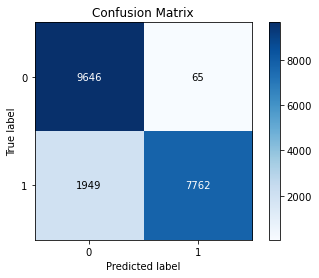

Accuracy: 0.89630 
Precision: 0.99170 
Recall: 0.79930 
F-measure: 0.88516 


In [75]:
y_dos_prediction = randomForest(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

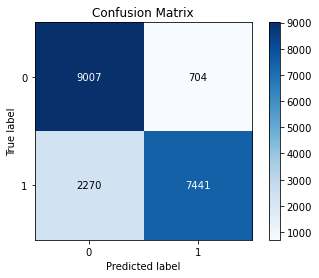

Accuracy: 0.84687 
Precision: 0.91357 
Recall: 0.76624 
F-measure: 0.83345 


In [76]:
y_dos_prediction = randomForest(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [77]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999851506521334,
 'Mean Training Precision': 0.9999817881450539,
 'Mean Training Recall': 0.9999879874991537,
 'Mean Training F1 Score': 0.9999848877623828,
 'Mean Validation Accuracy': 0.9994951281609532,
 'Mean Validation Precision': 0.9986658412603141,
 'Mean Validation Recall': 0.9988217226915547,
 'Mean Validation F1 Score': 0.9987434764204831}

#### K-fold cross validation on probe Standard Scaling

In [78]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999777259782003,
 'Mean Training Precision': 0.9999682092559237,
 'Mean Training Recall': 0.9999864554955995,
 'Mean Training F1 Score': 0.999977332250938,
 'Mean Validation Accuracy': 0.9994877026022619,
 'Mean Validation Precision': 0.9985156148959721,
 'Mean Validation Recall': 0.9990290627851891,
 'Mean Validation F1 Score': 0.998771724020641}

#### Stratified cross validation on probe

In [79]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999851506521334,
 'Mean Training Precision': 0.9999835008274287,
 'Mean Training Recall': 0.9999868005585005,
 'Mean Training F1 Score': 0.9999851506657436,
 'Mean Validation Accuracy': 0.9994357297553526,
 'Mean Validation Precision': 0.9994803595298901,
 'Mean Validation Recall': 0.9993911626205614,
 'Mean Validation F1 Score': 0.9994355359176217}

#### Stratified cross validation on probe Standard Scaling

In [80]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999777259782003,
 'Mean Training Precision': 0.999970301767042,
 'Mean Training Recall': 0.9999851506385216,
 'Mean Training F1 Score': 0.9999777261415336,
 'Mean Validation Accuracy': 0.9994951265071542,
 'Mean Validation Precision': 0.9995841928022766,
 'Mean Validation Recall': 0.9994060126354114,
 'Mean Validation F1 Score': 0.9994949471452965}

#### Predict on probe

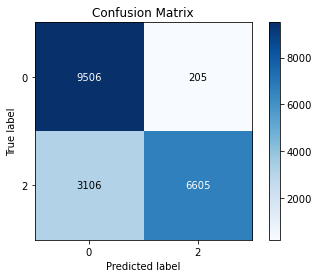

Accuracy: 0.82952 
Precision: 0.96990 
Recall: 0.68016 
F-measure: 0.79959 


In [81]:
y_probe_rfe_prediction = randomForest(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

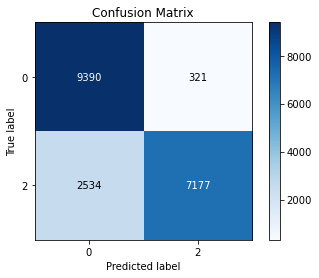

Accuracy: 0.85300 
Precision: 0.95719 
Recall: 0.73906 
F-measure: 0.83410 


In [82]:
y_probe_rfe_prediction = randomForest(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [83]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9998218125009275,
 'Mean Validation Precision': 0.9924237193043026,
 'Mean Validation Recall': 0.995499060288917,
 'Mean Validation F1 Score': 0.9938998282510736}

#### K-fold cross validation on r2l Standard Scaling

In [84]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9997846902201344,
 'Mean Validation Precision': 0.9899101219924201,
 'Mean Validation Recall': 0.9955020762787752,
 'Mean Validation F1 Score': 0.9926473312461639}

#### Stratified cross validation on r2l

In [85]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9998069602810119,
 'Mean Validation Precision': 0.9997921856935438,
 'Mean Validation Recall': 0.9998217998217998,
 'Mean Validation F1 Score': 0.9998069144625005}

#### Stratified cross validation on r2l Standard Scaling

In [86]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9998143852884368,
 'Mean Validation Precision': 0.9997922077105443,
 'Mean Validation Recall': 0.9998366498366499,
 'Mean Validation F1 Score': 0.99981435656657}

#### Predict on r2l

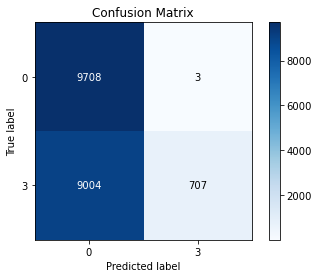

Accuracy: 0.53625 
Precision: 0.99577 
Recall: 0.07280 
F-measure: 0.13569 


In [87]:
y_r2l_rfe_prediction = randomForest(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

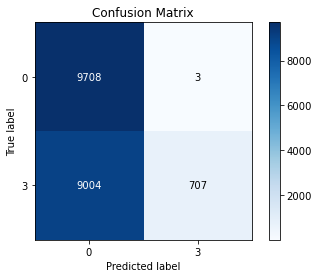

Accuracy: 0.53625 
Precision: 0.99577 
Recall: 0.07280 
F-measure: 0.13569 


In [88]:
y_probe_rfy_r2l_rfe_predictione_prediction = randomForest(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [89]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999925753260669,
 'Mean Training Precision': 0.9999847804929255,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999923901813563,
 'Mean Validation Accuracy': 0.9998440864206696,
 'Mean Validation Precision': 0.8806204906204906,
 'Mean Validation Recall': 0.9422979797979798,
 'Mean Validation F1 Score': 0.9073879142300194}

#### K-fold cross validation on u2r Standard Scaling

In [90]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999925753260669,
 'Mean Training Precision': 0.9999847804929255,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999923901813563,
 'Mean Validation Accuracy': 0.9998515108768282,
 'Mean Validation Precision': 0.8791452991452993,
 'Mean Validation Recall': 0.9631313131313132,
 'Mean Validation F1 Score': 0.9147008547008546}

#### Stratified cross validation on u2r

In [91]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999925753192611,
 'Mean Training Precision': 0.9999851508835216,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999925753805112,
 'Mean Validation Accuracy': 0.9998589325766547,
 'Mean Validation Precision': 0.9997773203098907,
 'Mean Validation Recall': 0.9999405999405999,
 'Mean Validation F1 Score': 0.9998589386344461}

#### Stratified cross validation on u2r Standard Scaling

In [92]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999925753192611,
 'Mean Training Precision': 0.9999851508835216,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999925753805112,
 'Mean Validation Accuracy': 0.9998440831130712,
 'Mean Validation Precision': 0.9997476335069839,
 'Mean Validation Recall': 0.9999405999405999,
 'Mean Validation F1 Score': 0.9998440919268672}

#### Predict on u2r

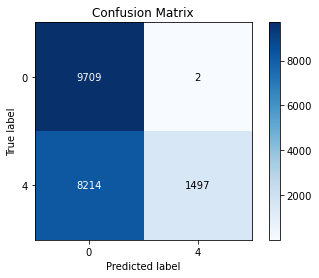

Accuracy: 0.57697 
Precision: 0.99867 
Recall: 0.15416 
F-measure: 0.26708 


In [93]:
y_u2r_rfe_prediction = randomForest(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

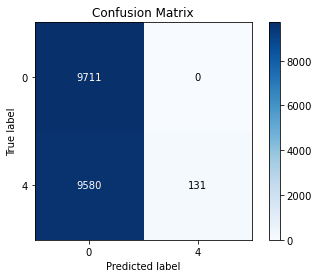

Accuracy: 0.50674 
Precision: 1.00000 
Recall: 0.01349 
F-measure: 0.02662 


In [94]:
y_u2r_rfe_prediction = randomForest(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Feature selection

In [95]:
X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [96]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [97]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999472022952556,
 'Mean Training Precision': 0.9999604636194246,
 'Mean Training Recall': 0.9999336337238443,
 'Mean Training F1 Score': 0.9999470475248916,
 'Mean Validation Accuracy': 0.9996436194891908,
 'Mean Validation Precision': 0.9996621473160812,
 'Mean Validation Recall': 0.9995261616465815,
 'Mean Validation F1 Score': 0.9995941097041927}

#### K-fold cross validation on dos Standard Scaler

In [98]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999480272620508,
 'Mean Training Precision': 0.9999572373382387,
 'Mean Training Recall': 0.9999384747014146,
 'Mean Training F1 Score': 0.9999478554419424,
 'Mean Validation Accuracy': 0.9996658934089331,
 'Mean Validation Precision': 0.9997080795222679,
 'Mean Validation Recall': 0.9995260197740533,
 'Mean Validation F1 Score': 0.9996169912885986}

#### Stratified cross validation on dos

In [99]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999480272688563,
 'Mean Training Precision': 0.9999670008925575,
 'Mean Training Recall': 0.9999290531959029,
 'Mean Training F1 Score': 0.9999480262479737,
 'Mean Validation Accuracy': 0.9996213466719815,
 'Mean Validation Precision': 0.9996881739040828,
 'Mean Validation Recall': 0.9995545260133236,
 'Mean Validation F1 Score': 0.9996213141330166}

#### Stratified cross validation on dos Standard Scaler

In [100]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999480272688563,
 'Mean Training Precision': 0.9999637012975944,
 'Mean Training Recall': 0.9999323530086377,
 'Mean Training F1 Score': 0.9999480264113079,
 'Mean Validation Accuracy': 0.9996584706065736,
 'Mean Validation Precision': 0.9997623952949691,
 'Mean Validation Recall': 0.9995545282182254,
 'Mean Validation F1 Score': 0.9996584187687002}

#### Predict on dos

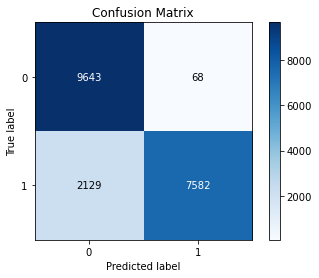

Accuracy: 0.88688 
Precision: 0.99111 
Recall: 0.78076 
F-measure: 0.87345 


In [101]:
y_dos_rfe_prediction = randomForest(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

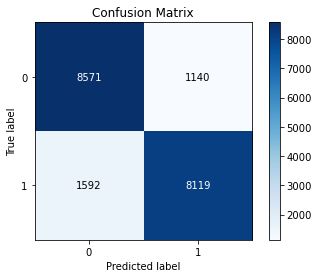

Accuracy: 0.85933 
Precision: 0.87688 
Recall: 0.83606 
F-measure: 0.85598 


In [102]:
y_dos_rfe_prediction = randomForest(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [103]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999851506521334,
 'Mean Training Precision': 0.9999848867898073,
 'Mean Training Recall': 0.9999848886623262,
 'Mean Training F1 Score': 0.9999848877143636,
 'Mean Validation Accuracy': 0.9993689096499253,
 'Mean Validation Precision': 0.998337651418279,
 'Mean Validation Recall': 0.9985616534491601,
 'Mean Validation F1 Score': 0.998448873703549}

#### K-fold cross validation on probe Standard Scaler

In [104]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999777259782003,
 'Mean Training Precision': 0.9999682092559237,
 'Mean Training Recall': 0.9999864554955995,
 'Mean Training F1 Score': 0.999977332250938,
 'Mean Validation Accuracy': 0.9993392123765574,
 'Mean Validation Precision': 0.9982055662548678,
 'Mean Validation Recall': 0.9985396609300791,
 'Mean Validation F1 Score': 0.9983718839884226}

#### Stratified cross validation on probe

In [105]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999851506521334,
 'Mean Training Precision': 0.9999851506385216,
 'Mean Training Recall': 0.9999851506385216,
 'Mean Training F1 Score': 0.9999851506385216,
 'Mean Validation Accuracy': 0.9994134574894096,
 'Mean Validation Precision': 0.9994654629948817,
 'Mean Validation Recall': 0.9993614625908613,
 'Mean Validation F1 Score': 0.9994131996018825}

#### Stratified cross validation on probe Standard Scaler

In [106]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.999976901018211,
 'Mean Training Precision': 0.9999686519831646,
 'Mean Training Recall': 0.9999851506385216,
 'Mean Training F1 Score': 0.9999769012019597,
 'Mean Validation Accuracy': 0.999376333003551,
 'Mean Validation Precision': 0.9994505908391856,
 'Mean Validation Recall': 0.9993020669412653,
 'Mean Validation F1 Score': 0.9993760828815411}

#### Predict on probe

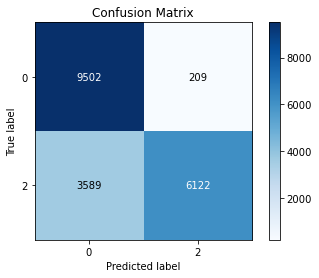

Accuracy: 0.80445 
Precision: 0.96699 
Recall: 0.63042 
F-measure: 0.76325 


In [107]:
y_probe_rfe_prediction = randomForest(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

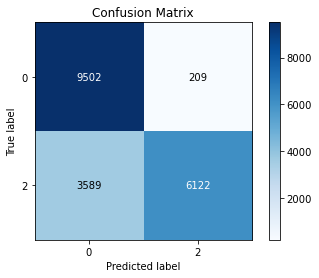

Accuracy: 0.80445 
Precision: 0.96699 
Recall: 0.63042 
F-measure: 0.76325 


In [108]:
y_r2l_rfe_prediction = randomForest(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [109]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9995619526765122,
 'Mean Validation Precision': 0.9813345507327809,
 'Mean Validation Recall': 0.9936796973217952,
 'Mean Validation F1 Score': 0.9874075960027661}

#### K-fold cross validation on r2l Standard Scaler

In [110]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9995619521252456,
 'Mean Validation Precision': 0.9813995585892181,
 'Mean Validation Recall': 0.9946211341434275,
 'Mean Validation F1 Score': 0.9879109117192358}

#### Stratified cross validation on r2l

In [111]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9996361939304995,
 'Mean Validation Precision': 0.9995249382148153,
 'Mean Validation Recall': 0.9997475497475496,
 'Mean Validation F1 Score': 0.9996361552622439}

#### Stratified cross validation on r2l Standard Scaler

In [112]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9996064944520657,
 'Mean Validation Precision': 0.9994657033903691,
 'Mean Validation Recall': 0.9997475497475496,
 'Mean Validation F1 Score': 0.9996064849580286}

#### Predict on r2l

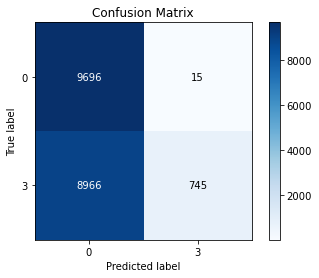

Accuracy: 0.53759 
Precision: 0.98026 
Recall: 0.07672 
F-measure: 0.14230 


In [113]:
y_r2l_rfe_prediction = randomForest(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

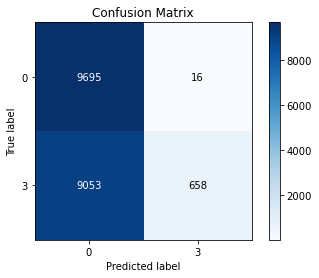

Accuracy: 0.53306 
Precision: 0.97626 
Recall: 0.06776 
F-measure: 0.12672 


In [114]:
y_r2l_rfe_prediction = randomForest(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [115]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999925753260669,
 'Mean Training Precision': 0.9999847804929255,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999923901813563,
 'Mean Validation Accuracy': 0.9998366619645112,
 'Mean Validation Precision': 0.8672549019607843,
 'Mean Validation Recall': 0.9609848484848484,
 'Mean Validation F1 Score': 0.9072378138416173}

#### K-fold cross validation on u2r Standard Scaler

In [116]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9999925753260669,
 'Mean Training Precision': 0.9999847804929255,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999923901813563,
 'Mean Validation Accuracy': 0.9998515108768282,
 'Mean Validation Precision': 0.883997668997669,
 'Mean Validation Recall': 0.9609848484848484,
 'Mean Validation F1 Score': 0.9148883572567783}

#### Stratified cross validation on u2r

In [117]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999925753192611,
 'Mean Training Precision': 0.9999851508835216,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999925753805112,
 'Mean Validation Accuracy': 0.9998440831130712,
 'Mean Validation Precision': 0.9997624747009137,
 'Mean Validation Recall': 0.9999257499257499,
 'Mean Validation F1 Score': 0.9998440853093771}

#### Stratified cross validation on u2r Standard Scaler

In [118]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9999917503592716,
 'Mean Training Precision': 0.9999835010452067,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 0.9999917504409381,
 'Mean Validation Accuracy': 0.9998440831130712,
 'Mean Validation Precision': 0.9997624835133232,
 'Mean Validation Recall': 0.9999257499257499,
 'Mean Validation F1 Score': 0.9998440875132152}

#### Predict on u2r

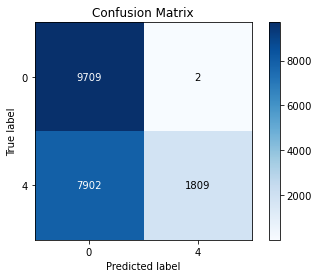

Accuracy: 0.59304 
Precision: 0.99890 
Recall: 0.18628 
F-measure: 0.31401 


In [119]:
y_u2r_rfe_prediction = randomForest(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

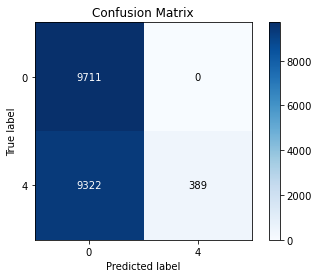

Accuracy: 0.52003 
Precision: 1.00000 
Recall: 0.04006 
F-measure: 0.07703 


In [120]:
y_u2r_rfe_prediction = randomForest(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

# Full DF, no Oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

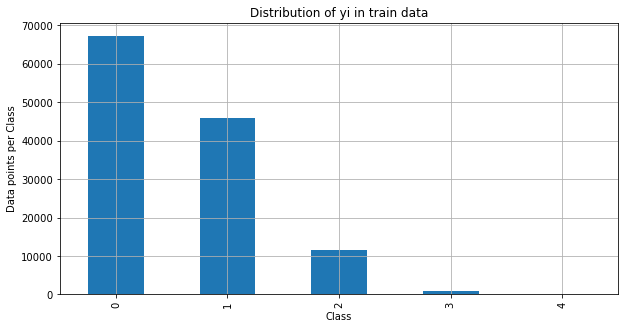

In [121]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()


fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

fullDf['label'], fullDf_test['label'] = prepareMulticlass()

plotDf(fullDf['label'])

In [122]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(fullDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(fullDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)


In [123]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

#### K-fold cross validation on dos

In [124]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9999597814464944,
 'Mean Training Precision': 0.9999346766409334,
 'Mean Training Recall': 0.9999661251168479,
 'Mean Training F1 Score': 0.9999504005130998,
 'Mean Validation Accuracy': 0.9998234307407081,
 'Mean Validation Precision': 0.9997812528760639,
 'Mean Validation Recall': 0.999782481016975,
 'Mean Validation F1 Score': 0.9997818475710135}

#### K-fold cross validation on dos Standard Scaling

In [125]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9999597814464944,
 'Mean Training Precision': 0.9999467618074178,
 'Mean Training Recall': 0.9999540392495703,
 'Mean Training F1 Score': 0.9999503998706407,
 'Mean Validation Accuracy': 0.9998322592036727,
 'Mean Validation Precision': 0.9998034061069075,
 'Mean Validation Recall': 0.9997823412738999,
 'Mean Validation F1 Score': 0.9997928580464688}

#### Stratified cross validation on dos

In [126]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9999597814464944,
 'Mean Training Precision': 0.9999491957724438,
 'Mean Training Recall': 0.9999516139177681,
 'Mean Training F1 Score': 0.9999504044207873,
 'Mean Validation Accuracy': 0.999849916129602,
 'Mean Validation Precision': 0.9997823105494689,
 'Mean Validation Recall': 0.9998475894236873,
 'Mean Validation F1 Score': 0.9998149322131074}

#### Stratified cross validation on dos Standard Scaling

In [127]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9999597814464944,
 'Mean Training Precision': 0.9999250068866035,
 'Mean Training Recall': 0.9999758070174136,
 'Mean Training F1 Score': 0.9999504057084158,
 'Mean Validation Accuracy': 0.999849916129602,
 'Mean Validation Precision': 0.9998040685937607,
 'Mean Validation Recall': 0.9998258124202032,
 'Mean Validation F1 Score': 0.9998149298434666}

#### Predict on dos

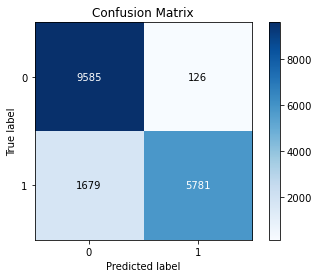

Accuracy: 0.89488 
Precision: 0.97867 
Recall: 0.77493 
F-measure: 0.86497 


In [128]:
y_dos_prediction = randomForest(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

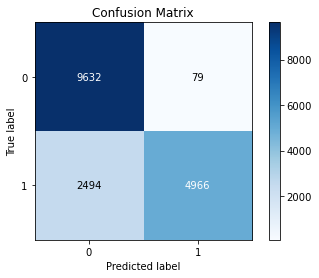

Accuracy: 0.85015 
Precision: 0.98434 
Recall: 0.66568 
F-measure: 0.79424 


In [129]:
y_dos_prediction = randomForest(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [130]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9999887481034397,
 'Mean Training Precision': 0.9999332716524671,
 'Mean Training Recall': 0.999990442511708,
 'Mean Training F1 Score': 0.9999618552633762,
 'Mean Validation Accuracy': 0.999367078992534,
 'Mean Validation Precision': 0.9994850588902542,
 'Mean Validation Recall': 0.9962147219380938,
 'Mean Validation F1 Score': 0.9978463385454628}

#### K-fold cross validation on probe Standard Scaling

In [131]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9999887481034397,
 'Mean Training Precision': 0.9999332716524671,
 'Mean Training Recall': 0.999990442511708,
 'Mean Training F1 Score': 0.9999618552633762,
 'Mean Validation Accuracy': 0.9993544207646858,
 'Mean Validation Precision': 0.9993956446163452,
 'Mean Validation Recall': 0.996201718345947,
 'Mean Validation F1 Score': 0.997795675023178}

#### Stratified cross validation on probe

In [132]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9999887481034397,
 'Mean Training Precision': 0.9999332770499543,
 'Mean Training Recall': 0.9999904680202079,
 'Mean Training F1 Score': 0.9999618707178648,
 'Mean Validation Accuracy': 0.9994177135064364,
 'Mean Validation Precision': 0.999483870872262,
 'Mean Validation Recall': 0.9965682167860482,
 'Mean Validation F1 Score': 0.9980236481586342}

#### Stratified cross validation on probe Standard Scaling

In [133]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9999887481034397,
 'Mean Training Precision': 0.9999332779584542,
 'Mean Training Recall': 0.9999904671115349,
 'Mean Training F1 Score': 0.9999618707177783,
 'Mean Validation Accuracy': 0.9993670789925337,
 'Mean Validation Precision': 0.9993123435217995,
 'Mean Validation Recall': 0.9963968374325489,
 'Mean Validation F1 Score': 0.9978517896024771}

#### Predict on probe

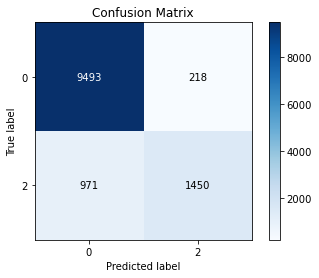

Accuracy: 0.90199 
Precision: 0.86930 
Recall: 0.59893 
F-measure: 0.70922 


In [134]:
y_probe_prediction = randomForest(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

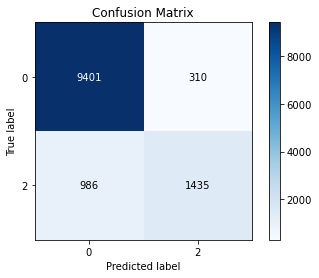

Accuracy: 0.89318 
Precision: 0.82235 
Recall: 0.59273 
F-measure: 0.68891 


In [135]:
y_probe_prediction = randomForest(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [136]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9993122515109304,
 'Mean Validation Precision': 0.9922443184077974,
 'Mean Validation Recall': 0.9602778818562209,
 'Mean Validation F1 Score': 0.9759148296601641}

#### K-fold cross validation on r2l Standard Scaling

In [137]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9999983740894901,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.9998875140607424,
 'Mean Training F1 Score': 0.9999437253798537,
 'Mean Validation Accuracy': 0.9993707823859671,
 'Mean Validation Precision': 0.9922556534809047,
 'Mean Validation Recall': 0.9636177143285195,
 'Mean Validation F1 Score': 0.977630860434061}

#### Stratified cross validation on r2l

In [138]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9993415169484487,
 'Mean Validation Precision': 0.9928339575928039,
 'Mean Validation Recall': 0.9618181818181817,
 'Mean Validation F1 Score': 0.9769927640923699}

#### Stratified cross validation on r2l Standard Scaling

In [139]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Training F1 Score': 1.0,
 'Mean Validation Accuracy': 0.9993415190899266,
 'Mean Validation Precision': 0.9918750637950392,
 'Mean Validation Recall': 0.962838383838384,
 'Mean Validation F1 Score': 0.9770009873769727}

#### Predict on r2l

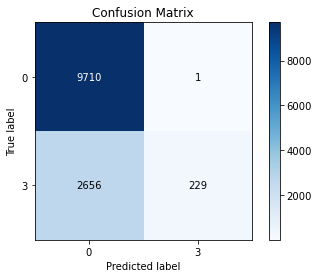

Accuracy: 0.78906 
Precision: 0.99565 
Recall: 0.07938 
F-measure: 0.14703 


In [140]:
y_r2l_prediction = randomForest(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

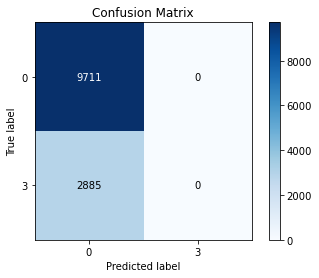

Accuracy: 0.77096 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
y_r2l_prediction = randomForest(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [142]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9999868107591222,
 'Mean Training Precision': 0.9979166666666666,
 'Mean Training Recall': 0.9849574608247134,
 'Mean Training F1 Score': 0.991344340143591,
 'Mean Validation Accuracy': 0.9996142147022317,
 'Mean Validation Precision': 0.9466666666666667,
 'Mean Validation Recall': 0.5483333333333333,
 'Mean Validation F1 Score': 0.681060606060606}

#### K-fold cross validation on u2r Standard Scaling

In [143]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9999868107591222,
 'Mean Training Precision': 0.9977777777777778,
 'Mean Training Recall': 0.9851025285229726,
 'Mean Training F1 Score': 0.9913475326870722,
 'Mean Validation Accuracy': 0.9995845345068324,
 'Mean Validation Precision': 0.8800000000000001,
 'Mean Validation Recall': 0.545,
 'Mean Validation F1 Score': 0.6622510822510823}

#### Stratified cross validation on u2r

In [144]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9999851621176031,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.9808048103607773,
 'Mean Training F1 Score': 0.9902755729543948,
 'Mean Validation Accuracy': 0.9995400175161808,
 'Mean Validation Precision': 0.875,
 'Mean Validation Recall': 0.47666666666666674,
 'Mean Validation F1 Score': 0.5940836940836941}

#### Stratified cross validation on u2r Standard Scaling

In [145]:
stratifiedCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9999868107591222,
 'Mean Training Precision': 0.997872340425532,
 'Mean Training Recall': 0.9851063829787234,
 'Mean Training F1 Score': 0.9913978494623656,
 'Mean Validation Accuracy': 0.9995993757053478,
 'Mean Validation Precision': 0.8716666666666667,
 'Mean Validation Recall': 0.58,
 'Mean Validation F1 Score': 0.6798701298701297}

#### Predict on u2r

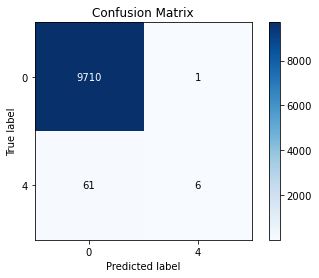

Accuracy: 0.99366 
Precision: 0.85714 
Recall: 0.08955 
F-measure: 0.16216 


In [146]:
y_u2r_prediction = randomForest(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

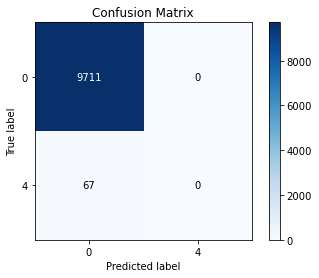

Accuracy: 0.99315 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
y_u2r_prediction = randomForest(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

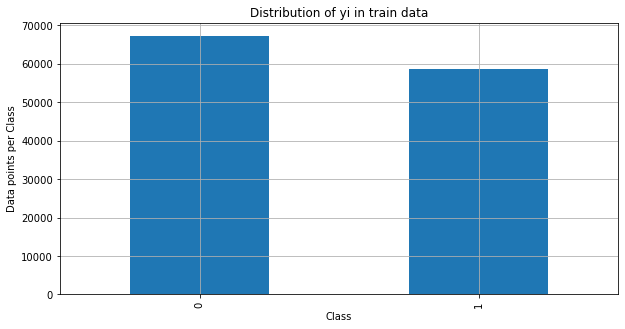

In [148]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()

fullDf['label'], fullDf_test['label'] = prepareBinary()

fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

colNames=list(fullDf)
colNames_test=list(fullDf_test)

plotDf(fullDf['label'])


In [149]:
x_df, y_df = getXandY(fullDf)
x_df_test, y_df_test = getXandY(fullDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)


In [150]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9999488426641225,
 'Mean Training Precision': 0.9999317749270589,
 'Mean Training Recall': 0.9999583098813986,
 'Mean Training F1 Score': 0.9999450420267859,
 'Mean Validation Accuracy': 0.9989442188972362,
 'Mean Validation Precision': 0.9994697269362354,
 'Mean Validation Recall': 0.9982588542654008,
 'Mean Validation F1 Score': 0.9988639051881212}

In [151]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9999497246927884,
 'Mean Training Precision': 0.9999393600930493,
 'Mean Training Recall': 0.9999526177904015,
 'Mean Training F1 Score': 0.999945988663425,
 'Mean Validation Accuracy': 0.9989918480251605,
 'Mean Validation Precision': 0.9995198694894194,
 'Mean Validation Recall': 0.9983089879901478,
 'Mean Validation F1 Score': 0.9989140361015618}

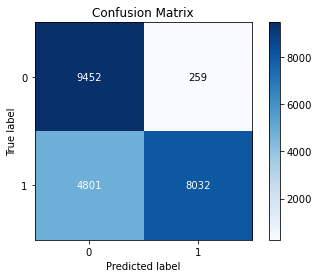

Accuracy: 0.77555 
Precision: 0.96876 
Recall: 0.62589 
F-measure: 0.76046 


In [152]:
y_prediction = randomForest(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

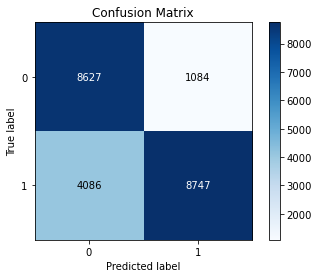

Accuracy: 0.77067 
Precision: 0.88974 
Recall: 0.68160 
F-measure: 0.77188 


In [153]:
y_prediction = randomForest(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [154]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df), y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [155]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df_ss), y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [156]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9998544661881231,
 'Mean Training Precision': 0.9998066996848853,
 'Mean Training Recall': 0.9998806302689269,
 'Mean Training F1 Score': 0.9998436618610704,
 'Mean Validation Accuracy': 0.9978963856444777,
 'Mean Validation Precision': 0.9984105828191204,
 'Mean Validation Recall': 0.9970661407141292,
 'Mean Validation F1 Score': 0.997737561876163}

#### K-fold cross validation Standard Scaler

In [157]:
KfoldCV(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9998562302298957,
 'Mean Training Precision': 0.9997934681573339,
 'Mean Training Recall': 0.9998976625856504,
 'Mean Training F1 Score': 0.9998455610745672,
 'Mean Validation Accuracy': 0.9979678255555747,
 'Mean Validation Precision': 0.9984450318223947,
 'Mean Validation Recall': 0.9971830952139991,
 'Mean Validation F1 Score': 0.9978133500045436}

#### Predict

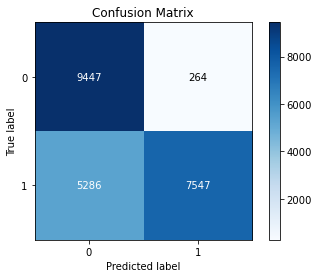

Accuracy: 0.75381 
Precision: 0.96620 
Recall: 0.58809 
F-measure: 0.73116 


In [158]:
y_prediction = randomForest(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

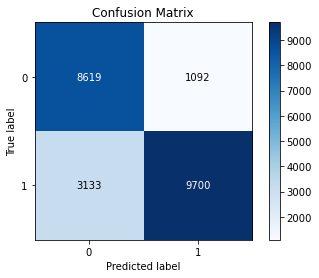

Accuracy: 0.81259 
Precision: 0.89881 
Recall: 0.75586 
F-measure: 0.82116 


In [159]:
y_prediction = randomForest(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)